图表已保存为 experimental_results3.pdf


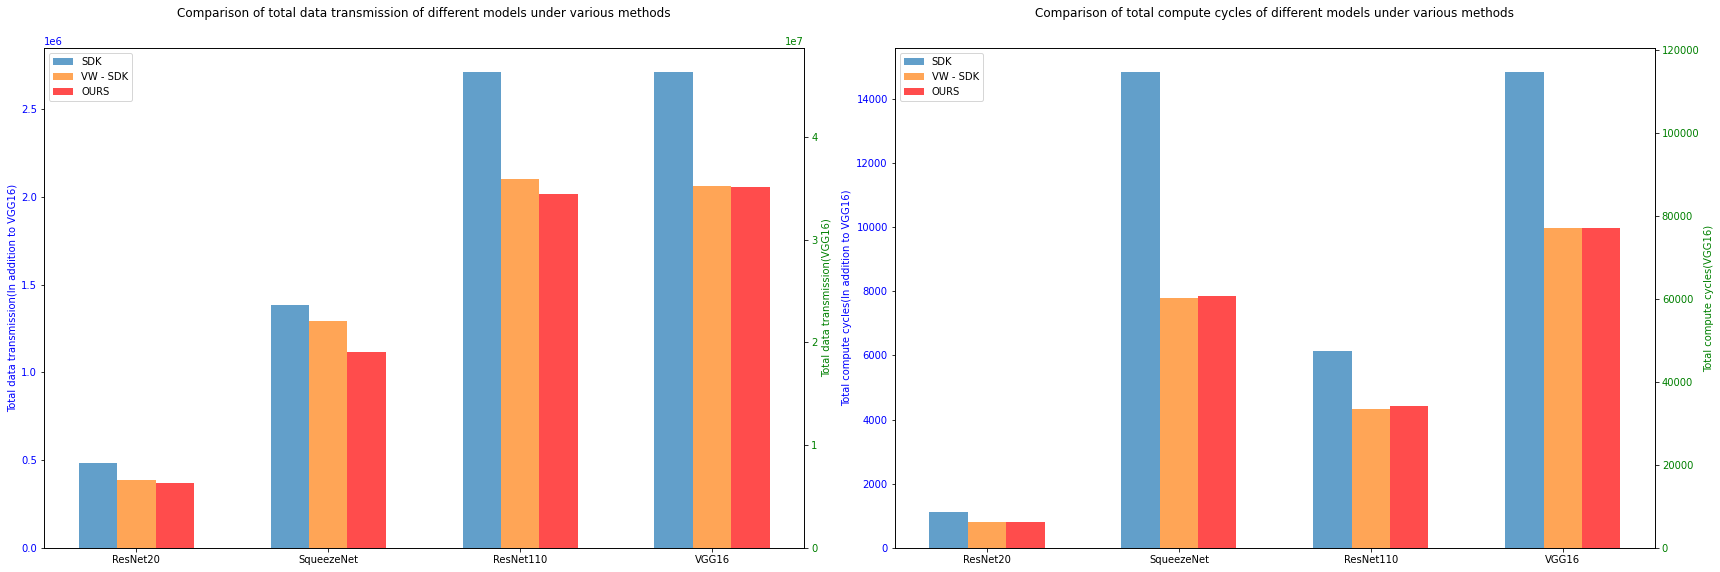

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# 原始数据，去掉 Im2col
# data1 = {
#     'Model': ['ResNet20', 'SqueezeNet', 'ResNet110', 'VGG16'],
#     'SDK': [481900, 1381648, 2711020, 46322224],
#     'VW - SDK': [384488, 1294576, 2100968, 35187024],
#     'OURS': [356528, 1088320, 1923248, 32972352]
# }
data1 = {
    'Model': ['ResNet20', 'SqueezeNet', 'ResNet110', 'VGG16'],
    'SDK': [481900, 1381648, 2711084, 46322224],
    'VW - SDK': [384488, 1294576, 2101032, 35187024],
    'OURS': [369968, 1116832, 2017392, 35075136]
}

# 新数据，去掉 Im2col
data2 = {
    'Model': ['ResNet20', 'SqueezeNet', 'ResNet110', 'VGG16'],
    'SDK': [1120, 14843, 6130, 114697],
    'VW - SDK': [804, 7802, 4345, 77102],
    'OURS': [814, 7840, 4415, 77102]
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 创建一个包含两个子图的画布
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

# 第一个子图：原始数据
ax1 = axes[0]
# 绘制除VGG16外其他模型的柱状图
df1_except_vgg16 = df1[df1['Model'] != 'VGG16']
bar_width = 0.2
index = range(len(df1_except_vgg16))
for i, col in enumerate(df1_except_vgg16.columns[1:]):
    if col == 'OURS':
        ax1.bar([pos + i * bar_width for pos in index], df1_except_vgg16[col], width=bar_width,
                label=col, color='red', alpha=0.7)
    else:
        ax1.bar([pos + i * bar_width for pos in index], df1_except_vgg16[col], width=bar_width,
                label=col, alpha=0.7)

# 设置主坐标轴标签等
ax1.set_ylabel('Total data transmission(In addition to VGG16)', color='blue')
# 设置标题并指定y参数确保对齐
ax1.set_title('Comparison of total data transmission of different models under various methods', y=1.05)
# 调整 x 轴刻度位置，包含 VGG16 的位置
x_ticks_pos = [pos + bar_width * (len(df1.columns) - 2) / 2 for pos in index] + [len(df1_except_vgg16) + bar_width * (len(df1.columns) - 2) / 2]
# 调整 x 轴刻度标签，包含 VGG16
x_tick_labels = list(df1_except_vgg16['Model']) + ['VGG16']
ax1.set_xticks(x_ticks_pos)
ax1.set_xticklabels(x_tick_labels)
ax1.tick_params(axis='y', labelcolor='blue')

# 创建副坐标轴
ax1_secondary = ax1.twinx()
# 绘制VGG16的柱状图
vgg16_data1 = df1[df1['Model'] == 'VGG16'].set_index('Model')
for i, col in enumerate(vgg16_data1.columns):
    if col == 'OURS':
        ax1_secondary.bar([len(df1_except_vgg16) + i * bar_width], vgg16_data1[col].values[0], width=bar_width,
                          color='red', alpha=0.7)
    else:
        ax1_secondary.bar([len(df1_except_vgg16) + i * bar_width], vgg16_data1[col].values[0], width=bar_width,
                          alpha=0.7)

# 设置副坐标轴标签等
ax1_secondary.set_ylabel('Total data transmission(VGG16)', color='green')
ax1_secondary.tick_params(axis='y', labelcolor='green')

# 添加图例（保持原位置）
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_secondary.get_legend_handles_labels()
ax1_secondary.legend(lines + lines2, labels + labels2, loc='upper left')

# 第二个子图：新数据
ax2 = axes[1]
# 绘制除VGG16外其他模型的柱状图
df2_except_vgg16 = df2[df2['Model'] != 'VGG16']
bar_width = 0.2
index = range(len(df2_except_vgg16))
for i, col in enumerate(df2_except_vgg16.columns[1:]):
    if col == 'OURS':
        ax2.bar([pos + i * bar_width for pos in index], df2_except_vgg16[col], width=bar_width,
                label=col, color='red', alpha=0.7)
    else:
        ax2.bar([pos + i * bar_width for pos in index], df2_except_vgg16[col], width=bar_width,
                label=col, alpha=0.7)

# 设置主坐标轴标签等
ax2.set_ylabel('Total compute cycles(In addition to VGG16)', color='blue')
# 设置标题并指定相同的y参数确保对齐
ax2.set_title('Comparison of total compute cycles of different models under various methods', y=1.05)
# 调整 x 轴刻度位置，包含 VGG16 的位置
x_ticks_pos = [pos + bar_width * (len(df2.columns) - 2) / 2 for pos in index] + [len(df2_except_vgg16) + bar_width * (len(df2.columns) - 2) / 2]
# 调整 x 轴刻度标签，包含 VGG16
x_tick_labels = list(df2_except_vgg16['Model']) + ['VGG16']
ax2.set_xticks(x_ticks_pos)
ax2.set_xticklabels(x_tick_labels)
ax2.tick_params(axis='y', labelcolor='blue')

# 创建副坐标轴
ax2_secondary = ax2.twinx()
# 绘制VGG16的柱状图
vgg16_data2 = df2[df2['Model'] == 'VGG16'].set_index('Model')
for i, col in enumerate(vgg16_data2.columns):
    if col == 'OURS':
        ax2_secondary.bar([len(df2_except_vgg16) + i * bar_width], vgg16_data2[col].values[0], width=bar_width,
                          color='red', alpha=0.7)
    else:
        ax2_secondary.bar([len(df2_except_vgg16) + i * bar_width], vgg16_data2[col].values[0], width=bar_width,
                          alpha=0.7)

# 设置副坐标轴标签等
ax2_secondary.set_ylabel('Total compute cycles(VGG16)', color='green')
ax2_secondary.tick_params(axis='y', labelcolor='green')

# 添加图例（保持原位置）
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_secondary.get_legend_handles_labels()
ax2_secondary.legend(lines + lines2, labels + labels2, loc='upper left')

# 调整布局避免标签重叠等问题
plt.tight_layout()

# 保存为 PDF
pdf_path = 'experimental_results3.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig)

print(f"图表已保存为 {pdf_path}")
    

In [1]:
from noc import *
from GeneticOptimizer import *


num_chiplet = 3
num_tile = 16



mapping,net = read_net_mapping_strategy('Resnet20',512,512)
transfer_path = calculate_transferpath(mapping,net,8)
chip_map = allocate_chips(mapping,num_tile,num_chiplet)
split_data = split_transmissions(chip_map,transfer_path)
chip_layer,noc,nop = Sequential_mapping(split_data)
input_layout,all_chip = block_mapping(mapping,4)
optimized_layouts, hops_summary = optimize_all_chips(
    input_layout=input_layout,  # 显式传入布局参数
    pop_size=50,
    generations=100,
    mutation_rate=0.1
)

成功读取并处理文件:./Resnet20/NetWork_Resnet20_512_512_cof.csv,共20行
文件夹已存在：/home/zxf1/master_code/to_Interconnect
文件夹已存在：./to_Interconnect/chiplet_perlayer_resource

=== 芯片0优化过程 ===
优化前跳数总和：50
优化完成 | 最小跳数总和：41 | 跳数减少：9

=== 芯片1优化过程 ===
优化前跳数总和：57
优化完成 | 最小跳数总和：42 | 跳数减少：15

=== 芯片2优化过程 ===
优化前跳数总和：6
优化完成 | 最小跳数总和：4 | 跳数减少：2


In [2]:
full_result = GA_mapping(optimized_layouts, split_data)

In [3]:
parse_input_layout(input_layout)

{0: {'layer_res_map': {1: [0],
   2: [1, 2],
   3: [3, 4],
   4: [5, 6],
   5: [7, 8],
   6: [9, 10],
   7: [11, 12],
   8: [13],
   9: [14, 15]},
  'layer_count': {1: 1, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 1, 9: 2},
  'transmission_pairs': [(1, 2),
   (2, 3),
   (3, 4),
   (4, 5),
   (5, 6),
   (6, 7),
   (7, 8),
   (8, 9)],
  'all_layers': {1, 2, 3, 4, 5, 6, 7, 8, 9}},
 1: {'layer_res_map': {10: [0, 1],
   11: [2, 3],
   12: [4, 5],
   13: [6, 7],
   14: [8],
   15: [9, 10],
   16: [11, 12],
   17: [13, 14],
   18: [15]},
  'layer_count': {10: 2,
   11: 2,
   12: 2,
   13: 2,
   14: 1,
   15: 2,
   16: 2,
   17: 2,
   18: 1},
  'transmission_pairs': [(10, 11),
   (11, 12),
   (12, 13),
   (13, 14),
   (14, 15),
   (15, 16),
   (16, 17),
   (17, 18)],
  'all_layers': {10, 11, 12, 13, 14, 15, 16, 17, 18}},
 2: {'layer_res_map': {18: [0], 19: [1, 2], 20: [3]},
  'layer_count': {18: 1, 19: 2, 20: 1},
  'transmission_pairs': [(18, 19), (19, 20)],
  'all_layers': {18, 19, 20}}}

In [4]:
full_result

{'intra_records': {0: [[[8], [5, 12], 24576],
   [[5, 12], [9, 13], 131072],
   [[9, 13], [10, 14], 131072],
   [[10, 14], [6, 15], 131072],
   [[6, 15], [7, 11], 131072],
   [[7, 11], [2, 3], 131072],
   [[2, 3], [1], 131072],
   [[1], [0, 4], 131072]],
  1: [[[12, 14], [13, 15], 65536],
   [[13, 15], [9, 11], 65536],
   [[9, 11], [8, 10], 65536],
   [[8, 10], [5], 65536],
   [[5], [1, 4], 65536],
   [[1, 4], [0, 2], 32768],
   [[0, 2], [3, 6], 32768],
   [[3, 6], [7], 32768]],
  2: [[[10], [9, 14], 16384.0], [[9, 14], [13], 32768]]},
 'inter_records': [[[0], [1], 65536.0], [[1], [2], 49152.0]]}

In [5]:
split_data

{0: {'intra': [(1, 2, [24576, 1, 2]),
   (2, 3, [131072, 2, 2]),
   (3, 4, [131072, 2, 2]),
   (4, 5, [131072, 2, 2]),
   (5, 6, [131072, 2, 2]),
   (6, 7, [131072, 2, 2]),
   (7, 8, [131072, 2, 1]),
   (8, 9, [131072, 1, 2])],
  'inter': [(9, 10, 1, [65536, 2, 2])]},
 1: {'intra': [(10, 11, [65536, 2, 2]),
   (11, 12, [65536, 2, 2]),
   (12, 13, [65536, 2, 2]),
   (13, 14, [65536, 2, 1]),
   (14, 15, [65536, 1, 2]),
   (15, 16, [32768, 2, 2]),
   (16, 17, [32768, 2, 2]),
   (17, 18, [32768, 2, 1])],
  'inter': [(17, 18, 2, [32768, 2, 1]), (18, 19, 2, [16384.0, 1, 2])]},
 2: {'intra': [(18, 19, [16384.0, 1, 2]), (19, 20, [32768, 2, 1])],
  'inter': []}}

In [8]:
import os
from typing import List, Dict
import glob
import re
import subprocess

def process_network_traces(
    network_name: str,
    mapping_mode: str,  # "Ours", "Sqm", or "GA"
    measurement_method: str,  # "NoC" or "NoP"
    mesh: int
) -> Dict[str, List[str]]:
    """
    处理网络跟踪数据的函数
    
    参数:
        network_name: 网络名称字符串
        mapping_mode: 映射模式 ("Ours", "Sqm", "GA")
        measurement_method: 测量方法 ("NoC", "NoP")
    
    列表
    """
    # 1. 构建基础路径

    total_area = 0
    total_latency = 0
    total_power = 0
    if mapping_mode == 'Ours':

        base_path = os.path.join(
            "./", 
            mapping_mode, 
            f"{network_name}_{measurement_method}_traces"
        )

    elif mapping_mode == "GA":

        base_path = os.path.join(
            "./", 
            "Genetic_A", 
            f"{network_name}_{measurement_method}_traces"
        )

    else:
        base_path = os.path.join(
            "./", 
            "Interconnect", 
            f"{network_name}_{measurement_method}_traces"
        )
    
    # 检查路径是否存在
    if not os.path.exists(base_path):
        raise FileNotFoundError(f"路径不存在: {base_path}")
    
    # 2. 获取所有子文件夹
    result = {}
    
    # 遍历base_path下的所有文件夹
    for fold_idx,folder_name in enumerate(os.listdir(base_path)):
        folder_path = os.path.join(base_path, folder_name)
        
            
        # 3. 遍历文件夹中的所有txt文件
        files = glob.glob(folder_path+'/*txt')
        print(files)

        for file_idx,file in enumerate(files):

            fp = open('./Interconnect/mesh_config_trace_based', 'r')
           
            config_file = base_path+'/logs/chiplet_' + str(fold_idx) + '_mesh_config'
            outfile = open(config_file, 'w')
            for line in fp:
                line = line.strip()

                matchobj = re.match(r'^k=', line)

                if matchobj:
                    line = 'k=' + str(mesh) + ';'

                outfile.write(line + '\n')

            fp.close()
            outfile.close()

            # print(file)
            create_folder('logs',base_path)
            print(config_file)

            log_file = base_path + '/logs/' + folder_name + '_layer_' + str(file_idx) + '.log'
            print(log_file)

            os.system('cp ' + file + ' ' + base_path + '/trace_file.txt')

            booksim_command = '/home/zxf1/master_code/Interconnect/booksim ' + config_file + ' > ' + log_file

            os.system(booksim_command)
            
            # print(file_idx)
            latency = os.popen('grep "Trace is finished in" ' + log_file + ' | tail -1 | awk \'{print $5}\'').read().strip()
            # print(latency)
            # print('[ INFO] Latency for Chiplet : ' + str(chiplet_idx) + ' Layer : ' + str(run_id) + ' is ' + latency +'\n')
            total_latency = total_latency + int(latency)
    
    
            power = os.popen('grep "Total Power" ' + log_file + ' | tail -1 | awk \'{print $4}\'').read().strip()
    
            # print('[ INFO] Power for Chiplet : ' + str(chiplet_idx)  + ' Layer : ' + str(run_id) + ' is ' + power +'\n')
            
            total_power = total_power + float(power)
    
    
            area = os.popen('grep "Total Area" ' + log_file + ' | tail -1 | awk \'{print $4}\'').read().strip()
    
            # print('[ INFO] Area for Chiplet : ' + str(chiplet_idx)  + ' Layer : ' + str(run_id) + ' is ' + area +'\n')
    
            total_area = total_area + float(area)

            outfile_latency = open(base_path + '/logs/booksim_latency.csv', 'a')
            outfile_latency.write(folder_name + '_layer_' + str(file_idx) + ':' + str(total_latency) + '\n')
            outfile_latency.close()

        outfile_latency = open(base_path + '/logs/booksim_latency.csv', 'a')
        outfile_latency.write('Total NoC latency is' + '\t' + str(total_latency*1e-9) + '\t' + 's' + '\n')
        outfile_latency.close()


        outfile_power = open(base_path + '/logs/booksim_area.csv', 'a')
        outfile_power.write('Total NoC power is' + '\t' + str(total_power) + '\t' + 'mW' + '\n')
        outfile_power.close()

        outfile_area = open(base_path + '/logs/booksim_area.csv', 'a')
        outfile_area.write('Total NoC area is' + '\t' + str(total_area) +  '\t' + 'um^2' + '\n')
        outfile_area.close()



# 使用示例
if __name__ == "__main__":

    # 示例调用
    data = process_network_traces(
        network_name="Resnet20",
        mapping_mode="Sqm",
        measurement_method="NoC",
        mesh=4
    )


['./Interconnect/Resnet20_NoC_traces/Chiplet_0/trace_file_layer_4.txt', './Interconnect/Resnet20_NoC_traces/Chiplet_0/trace_file_layer_7.txt', './Interconnect/Resnet20_NoC_traces/Chiplet_0/trace_file_layer_0.txt', './Interconnect/Resnet20_NoC_traces/Chiplet_0/trace_file_layer_1.txt', './Interconnect/Resnet20_NoC_traces/Chiplet_0/trace_file_layer_2.txt', './Interconnect/Resnet20_NoC_traces/Chiplet_0/trace_file_layer_5.txt', './Interconnect/Resnet20_NoC_traces/Chiplet_0/trace_file_layer_6.txt', './Interconnect/Resnet20_NoC_traces/Chiplet_0/trace_file_layer_3.txt']
文件夹已存在：./Interconnect/Resnet20_NoC_traces/logs
./Interconnect/Resnet20_NoC_traces/logs/chiplet_0_mesh_config
./Interconnect/Resnet20_NoC_traces/logs/Chiplet_0_layer_0.log


Segmentation fault (core dumped)


ValueError: invalid literal for int() with base 10: ''

In [ ]:
os.listdir

{'Chiplet_0': ['./Interconnect/Resnet20_NoC_traces/Chiplet_0/trace_file_layer_4.txt',
  './Interconnect/Resnet20_NoC_traces/Chiplet_0/trace_file_layer_7.txt',
  './Interconnect/Resnet20_NoC_traces/Chiplet_0/trace_file_layer_0.txt',
  './Interconnect/Resnet20_NoC_traces/Chiplet_0/trace_file_layer_1.txt',
  './Interconnect/Resnet20_NoC_traces/Chiplet_0/trace_file_layer_2.txt',
  './Interconnect/Resnet20_NoC_traces/Chiplet_0/trace_file_layer_5.txt',
  './Interconnect/Resnet20_NoC_traces/Chiplet_0/trace_file_layer_6.txt',
  './Interconnect/Resnet20_NoC_traces/Chiplet_0/trace_file_layer_3.txt'],
 'Chiplet_2': ['./Interconnect/Resnet20_NoC_traces/Chiplet_2/trace_file_layer_0.txt',
  './Interconnect/Resnet20_NoC_traces/Chiplet_2/trace_file_layer_1.txt'],
 'Chiplet_1': ['./Interconnect/Resnet20_NoC_traces/Chiplet_1/trace_file_layer_4.txt',
  './Interconnect/Resnet20_NoC_traces/Chiplet_1/trace_file_layer_7.txt',
  './Interconnect/Resnet20_NoC_traces/Chiplet_1/trace_file_layer_0.txt',
  './Inter

In [1]:
import sys
print(sys.version)  # 应该显示 3.10.x
print(sys.executable)  # 应该指向 py310 环境的路径

3.10.18 (main, Jun  5 2025, 13:14:17) [GCC 11.2.0]
/home/zxf1/anaconda3/envs/py310/bin/python


In [9]:
import os

# 获取当前工作目录
current_path = os.getcwd()
print("当前工作目录是:", current_path)

当前工作目录是: /home/zxf1/master_code


findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Fo

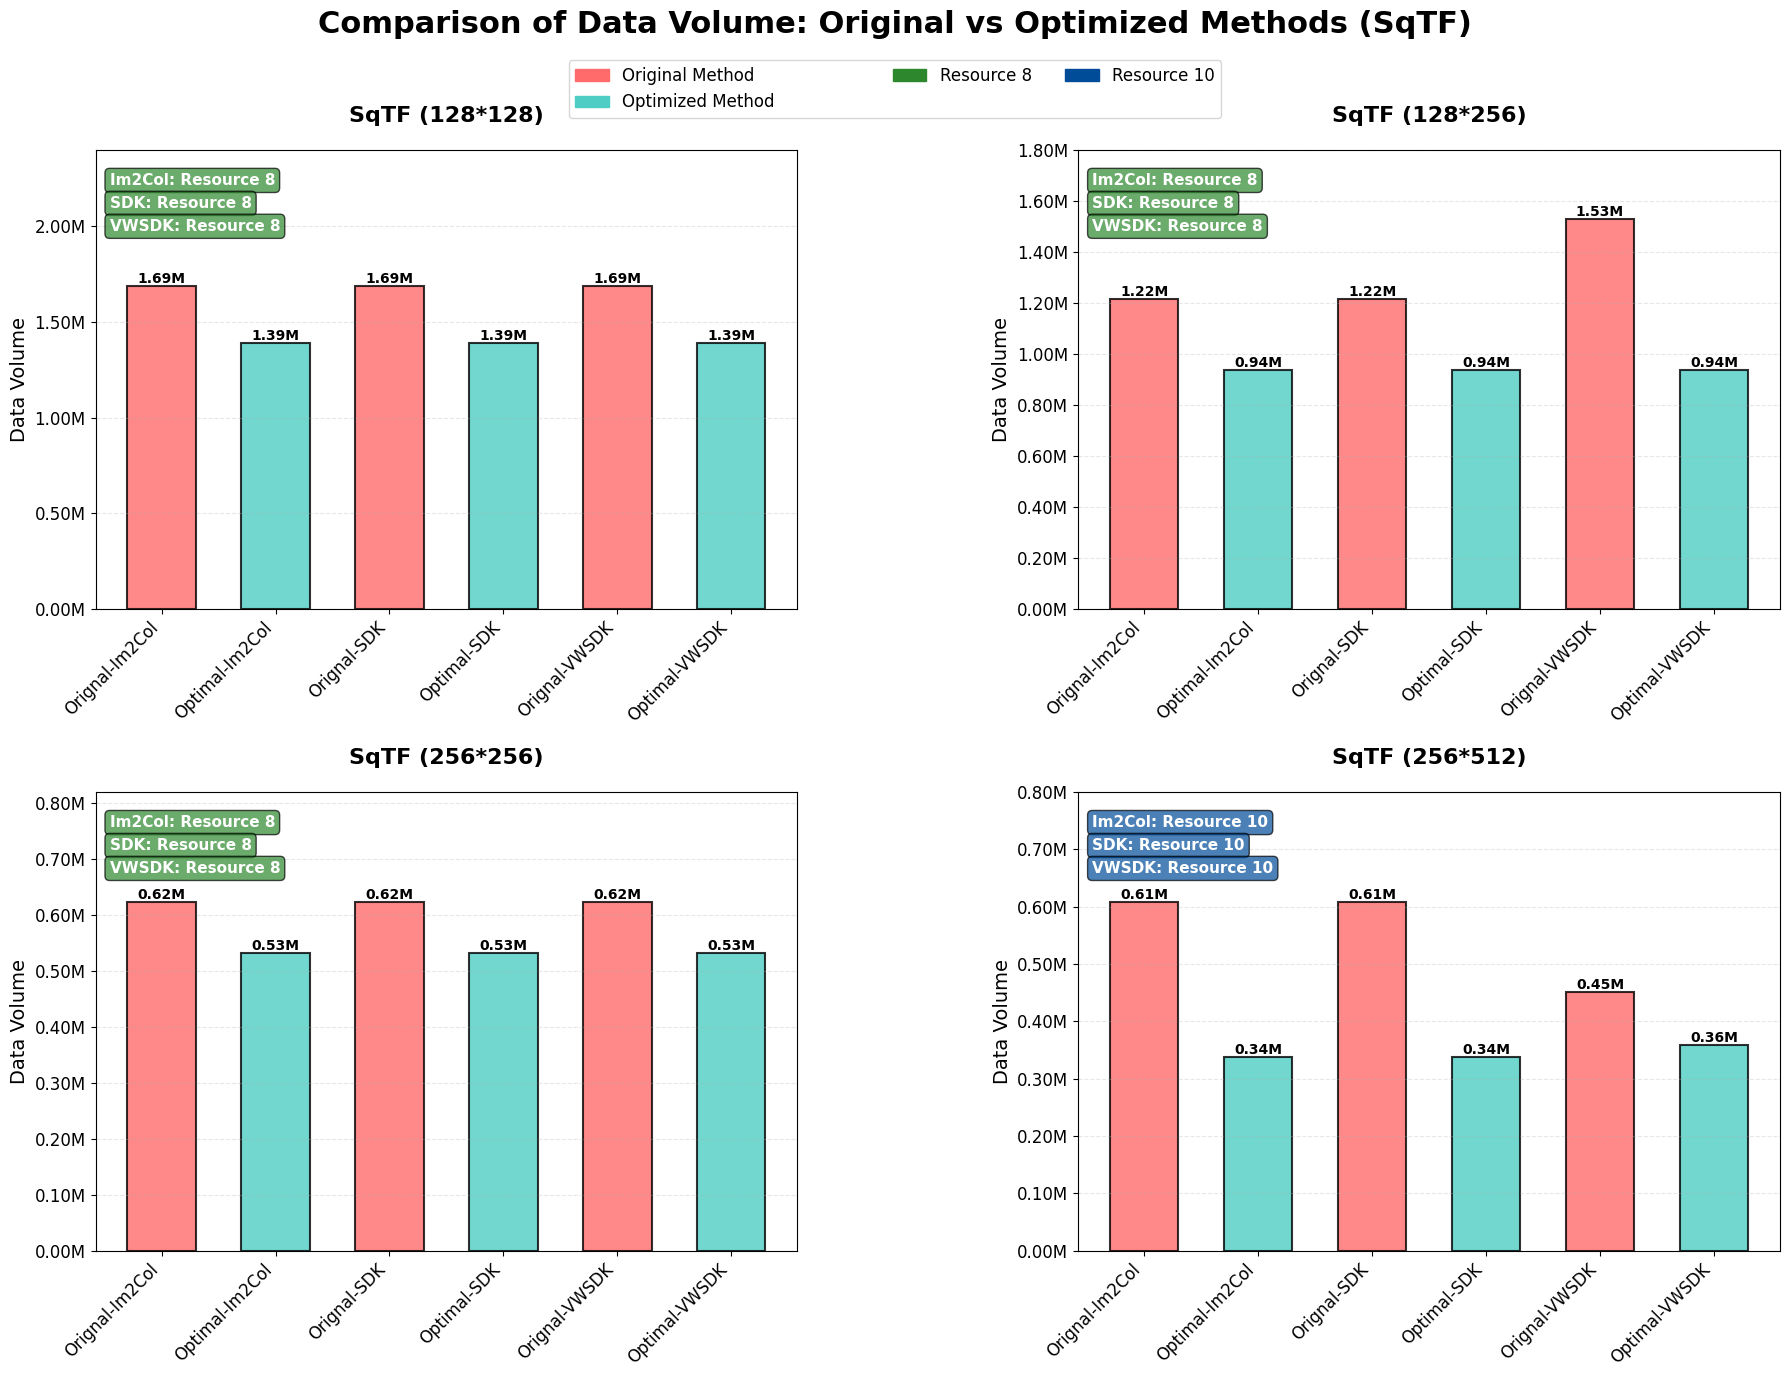

Chart generated and saved as 'sqtf_simple_color.pdf'


In [39]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# 确保负号正确显示
plt.rcParams['axes.unicode_minus'] = False

# SqTF数据
data = {
    'SqTF (128*128)': [
        ('Orignal-Im2Col', 1685952.0, 8),
        ('Optimal-Im2Col', 1389792.0, 8),
        ('Orignal-SDK', 1685952.0, 8),
        ('Optimal-SDK', 1389792.0, 8),
        ('Orignal-VWSDK', 1685952.0, 8),
        ('Optimal-VWSDK', 1389792.0, 8)
    ],
    'SqTF (128*256)': [
        ('Orignal-Im2Col', 1215456.0, 8),
        ('Optimal-Im2Col', 935520.0, 8),
        ('Orignal-SDK', 1215456.0, 8),
        ('Optimal-SDK', 935520.0, 8),
        ('Orignal-VWSDK', 1529120.0, 8),
        ('Optimal-VWSDK', 935520.0, 8)
    ],
    'SqTF (256*256)': [
        ('Orignal-Im2Col', 624416.0, 8),
        ('Optimal-Im2Col', 532480.0, 8),
        ('Orignal-SDK', 624416.0, 8),
        ('Optimal-SDK', 532480.0, 8),
        ('Orignal-VWSDK', 624416.0, 8),
        ('Optimal-VWSDK', 532480.0, 8)
    ],
    'SqTF (256*512)': [
        ('Orignal-Im2Col', 608192.0, 10),
        ('Optimal-Im2Col', 337792.0, 10),
        ('Orignal-SDK', 608192.0, 10),
        ('Optimal-SDK', 337792.0, 10),
        ('Orignal-VWSDK', 451360.0, 10),
        ('Optimal-VWSDK', 359424.0, 10)
    ]
}

# 定义每个子图的Y轴最大范围
y_limits = {
    'SqTF (128*128)': 2400000,
    'SqTF (128*256)': 1800000,
    'SqTF (256*256)': 820000,
    'SqTF (256*512)': 800000
}

# 简化的颜色方案：只区分Original和Optimal
colors = {
    'Orignal': '#FF6B6B',    # 红色系
    'Optimal': '#4ECDC4'     # 绿色系
}

# 资源值对应的颜色（用于图例和标注）
resource_colors = {8: '#2D882D', 10: '#004C99'}

# 创建2x2子图
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Comparison of Data Volume: Original vs Optimized Methods (SqTF)', fontsize=22, fontweight='bold')

# 柱子宽度设置
bar_width = 0.6

# 绘制每个子图
for i, (title, values) in enumerate(data.items()):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # 为每个柱子创建位置
    methods = [v[0] for v in values]
    x_positions = np.arange(len(methods))
    
    # 收集当前子图的资源信息（按方法类型分组）
    method_resource_map = {}
    for method, value, resource in values:
        method_type = method.split('-')[1]  # Im2Col, SDK, VWSDK
        if method_type not in method_resource_map:
            method_resource_map[method_type] = resource
    
    # 绘制柱状图
    for j, (method, value, resource) in enumerate(values):
        # 判断是Original还是Optimal
        opt_type = method.split('-')[0]  # Orignal or Optimal
        
        # 绘制柱状图（只用红绿两色区分）
        ax.bar(x_positions[j], value, width=bar_width, color=colors[opt_type], alpha=0.8,
               edgecolor='black', linewidth=1.5)
        
        # 柱子顶部添加数值标签
        ax.text(x_positions[j], value, f'{value/1e6:.2f}M', ha='center', va='bottom', 
                fontsize=10, fontweight='bold')
    
    # 在子图左上角添加资源信息标注（按方法类型）
    y_offset_step = 0.05
    y_start = 0.95
    for idx, (method_type, resource) in enumerate(method_resource_map.items()):
        resource_text = f'{method_type}: Resource {resource}'
        
        # 添加带颜色背景的标注
        ax.text(0.02, y_start - idx * y_offset_step, resource_text, 
                transform=ax.transAxes, ha='left', va='top',
                fontsize=11, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor=resource_colors[resource], 
                          alpha=0.7, edgecolor='black'),
                color='white')
    
    # 设置X轴标签
    ax.set_xticks(x_positions)
    ax.set_xticklabels(methods, rotation=45, ha='right', fontsize=12)
    
    # 设置子图标题和标签
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    ax.set_ylabel('Data Volume', fontsize=14)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, axis='y', alpha=0.3, linestyle='--')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.2f}M'))
    
    # 设置Y轴范围
    ax.set_ylim(0, y_limits[title])

# 创建图例
legend_elements = [
    # Original/Optimal图例
    Patch(color=colors['Orignal'], label='Original Method'),
    Patch(color=colors['Optimal'], label='Optimized Method'),
    # 资源图例分隔符
    Patch(color='white', label=' '),
    # 资源值图例
    Patch(color=resource_colors[8], label='Resource 8'),
    Patch(color=resource_colors[10], label='Resource 10')
]

# 添加图例
fig.legend(handles=legend_elements, 
           loc='upper center', bbox_to_anchor=(0.5, 0.95),
           ncol=4, fontsize=12, title_fontsize=14)

# 调整布局
plt.tight_layout()
plt.subplots_adjust(top=0.88, hspace=0.4, wspace=0.4)
plt.savefig('sqtf_simple_color.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("Chart generated and saved as 'sqtf_simple_color.pdf'")

findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Fo

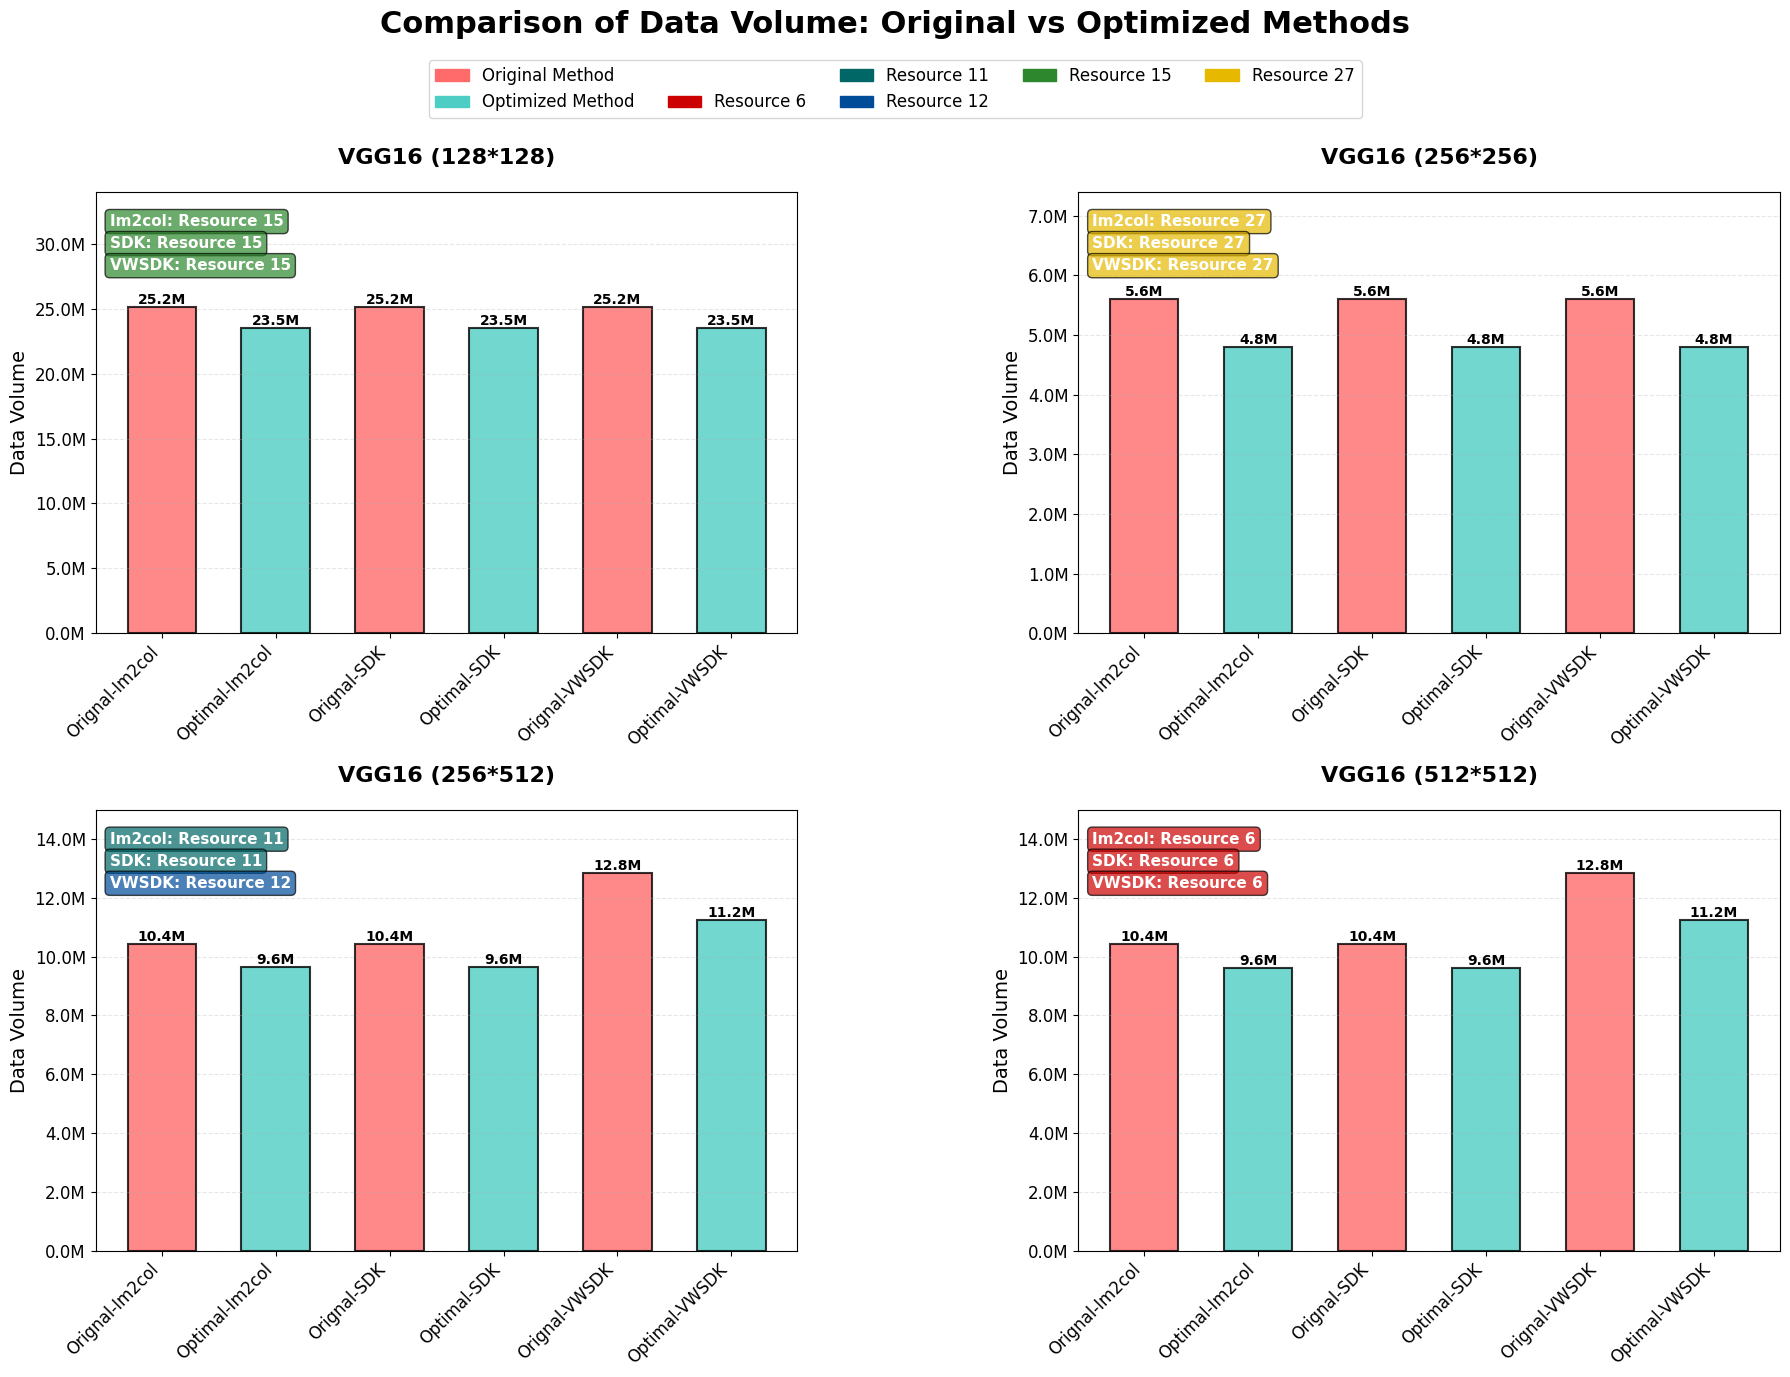

Chart generated and saved as 'vgg16_simple_color.pdf'


In [37]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# 确保负号正确显示
plt.rcParams['axes.unicode_minus'] = False

# 测试数据
data = {
    'VGG16 (128*128)': [
        ('Orignal-Im2col', 25155584, 15),
        ('Optimal-Im2col', 23549952, 15),
        ('Orignal-SDK', 25155584, 15),
        ('Optimal-SDK', 23549952, 15),
        ('Orignal-VWSDK', 25155584, 15),
        ('Optimal-VWSDK', 23549952, 15)
    ],
    'VGG16 (256*256)': [
        ('Orignal-Im2col', 5609984, 27),
        ('Optimal-Im2col', 4807168, 27),
        ('Orignal-SDK', 5609984, 27),
        ('Optimal-SDK', 4807168, 27),
        ('Orignal-VWSDK', 5609984, 27),
        ('Optimal-VWSDK', 4807168, 27)
    ],
    'VGG16 (256*512)': [
        ('Orignal-Im2col', 10435072, 11),
        ('Optimal-Im2col', 9632256, 11),
        ('Orignal-SDK', 10435072, 11),
        ('Optimal-SDK', 9632256, 11),
        ('Orignal-VWSDK', 12839424, 12),
        ('Optimal-VWSDK', 11233792, 12)
    ],
    'VGG16 (512*512)': [
        ('Orignal-Im2col', 10430976, 6),
        ('Optimal-Im2col', 9628160, 6),
        ('Orignal-SDK', 10430976, 6),
        ('Optimal-SDK', 9628160, 6),
        ('Orignal-VWSDK', 12839424, 6),
        ('Optimal-VWSDK', 11233792, 6)
    ]
}

# 定义每个子图的Y轴最大范围
y_limits = {
    'VGG16 (128*128)': 34000000,
    'VGG16 (256*256)': 7400000,
    'VGG16 (256*512)': 15000000,
    'VGG16 (512*512)': 15000000
}

# 简化的颜色方案：只区分Original和Optimal
colors = {
    'Orignal': '#FF6B6B',    # 红色系
    'Optimal': '#4ECDC4'     # 绿色系
}

# 资源值对应的颜色（用于图例和标注）
resource_colors = {6: '#CC0000', 11: '#006666', 12: '#004C99', 15: '#2D882D', 27: '#E6B800'}

# 创建2x2子图
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Comparison of Data Volume: Original vs Optimized Methods', fontsize=22, fontweight='bold')

# 柱子宽度设置
bar_width = 0.6

# 绘制每个子图
for i, (title, values) in enumerate(data.items()):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # 为每个柱子创建位置
    methods = [v[0] for v in values]
    x_positions = np.arange(len(methods))
    
    # 收集当前子图的资源信息（按方法类型分组）
    method_resource_map = {}
    for method, value, resource in values:
        method_type = method.split('-')[1]  # Im2col, SDK, VWSDK
        if method_type not in method_resource_map:
            method_resource_map[method_type] = resource
    
    # 绘制柱状图
    for j, (method, value, resource) in enumerate(values):
        # 判断是Original还是Optimal
        opt_type = method.split('-')[0]  # Orignal or Optimal
        
        # 绘制柱状图（只用红绿两色区分）
        ax.bar(x_positions[j], value, width=bar_width, color=colors[opt_type], alpha=0.8,
               edgecolor='black', linewidth=1.5)
        
        # 柱子顶部添加数值标签
        ax.text(x_positions[j], value, f'{value/1e6:.1f}M', ha='center', va='bottom', 
                fontsize=10, fontweight='bold')
    
    # 在子图左上角添加资源信息标注（按方法类型）
    y_offset_step = 0.05
    y_start = 0.95
    for idx, (method_type, resource) in enumerate(method_resource_map.items()):
        resource_text = f'{method_type}: Resource {resource}'
        
        # 添加带颜色背景的标注
        ax.text(0.02, y_start - idx * y_offset_step, resource_text, 
                transform=ax.transAxes, ha='left', va='top',
                fontsize=11, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor=resource_colors[resource], 
                          alpha=0.7, edgecolor='black'),
                color='white')
    
    # 设置X轴标签
    ax.set_xticks(x_positions)
    ax.set_xticklabels(methods, rotation=45, ha='right', fontsize=12)
    
    # 设置子图标题和标签
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    ax.set_ylabel('Data Volume', fontsize=14)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, axis='y', alpha=0.3, linestyle='--')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
    
    # 设置Y轴范围
    ax.set_ylim(0, y_limits[title])

# 创建图例
legend_elements = [
    # Original/Optimal图例
    Patch(color=colors['Orignal'], label='Original Method'),
    Patch(color=colors['Optimal'], label='Optimized Method'),
    # 资源图例分隔符
    Patch(color='white', label=' '),
    # 资源值图例
    Patch(color=resource_colors[6], label='Resource 6'),
    Patch(color=resource_colors[11], label='Resource 11'),
    Patch(color=resource_colors[12], label='Resource 12'),
    Patch(color=resource_colors[15], label='Resource 15'),
    Patch(color=resource_colors[27], label='Resource 27')
]

# 添加图例
fig.legend(handles=legend_elements, 
           loc='upper center', bbox_to_anchor=(0.5, 0.95),
           ncol=5, fontsize=12, title_fontsize=14)

# 调整布局
plt.tight_layout()
plt.subplots_adjust(top=0.85, hspace=0.4, wspace=0.4)
plt.savefig('vgg16_simple_color.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("Chart generated and saved as 'vgg16_simple_color.pdf'")

findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Fo

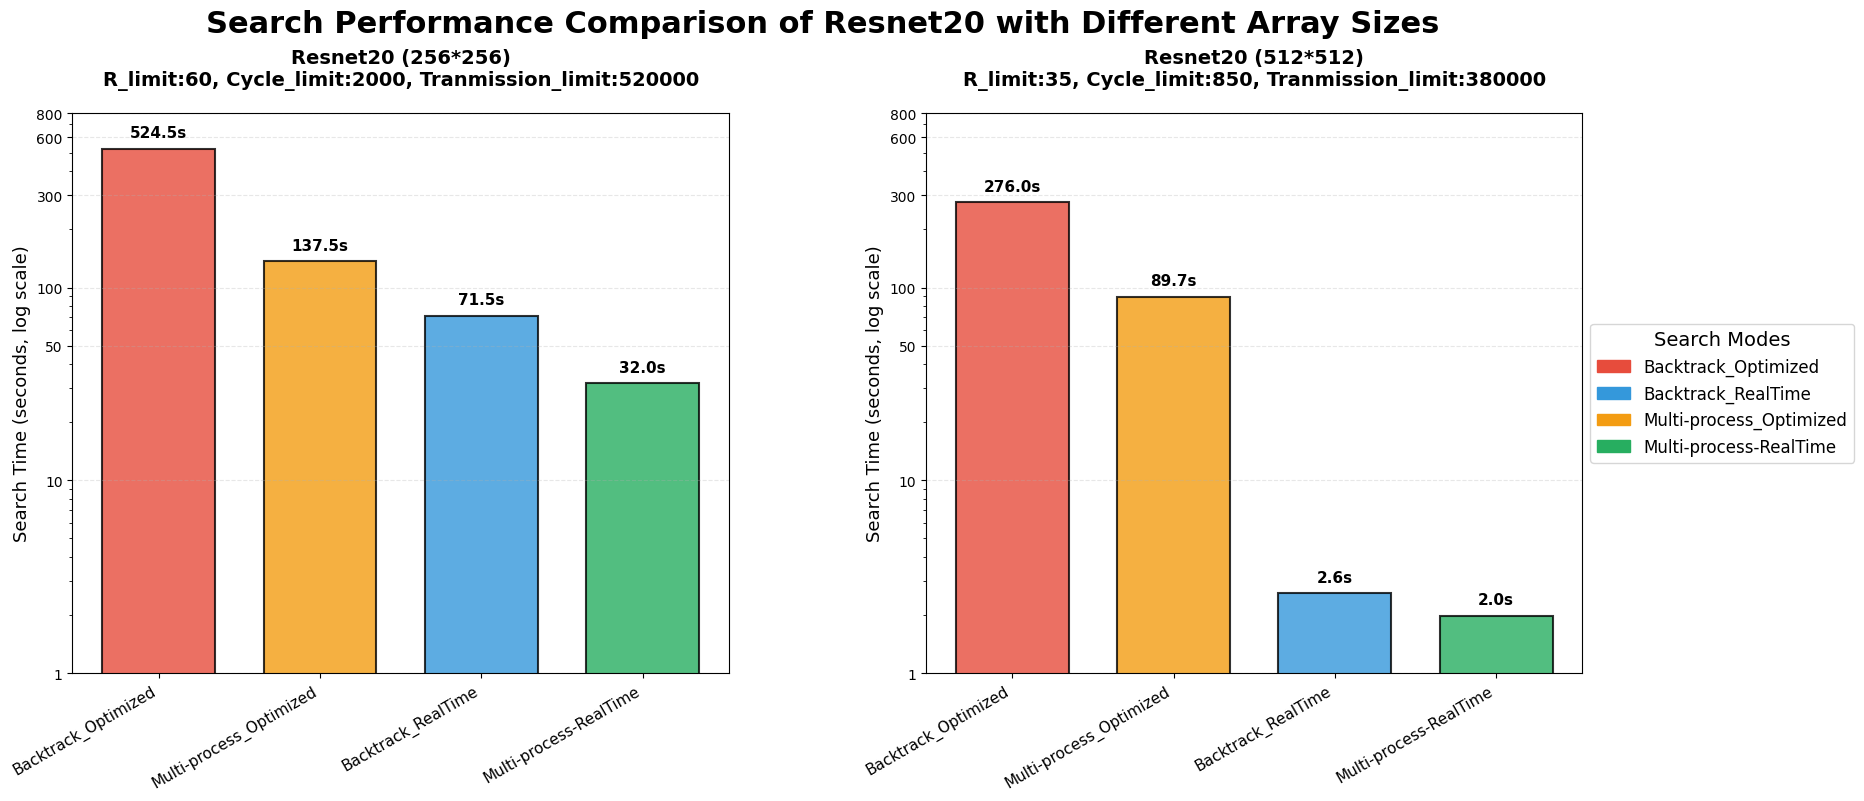

Optimized chart generated as 'resnet20_search_optimized_performance.pdf'


In [51]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# 确保负号正确显示
plt.rcParams['axes.unicode_minus'] = False

# 整理数据（按“耗时”从大到小排序）
data = {
    'Resnet20 (256*256)': {
        'params': 'R_limit:60, Cycle_limit:2000, Tranmission_limit:520000',
        'modes': [
            ('repeat_pruned + Backtrack_Optimized', 524.54, 1156),
            ('repeat_pruned + Multi-process_Optimized', 137.48, 1156),
            ('repeat_pruned + Backtrack_RealTime', 71.49, 1156),
            ('repeat_pruned + Multi-process-RealTime', 32.05, 1156)
        ]
    },
    'Resnet20 (512*512)': {
        'params': 'R_limit:35, Cycle_limit:850, Tranmission_limit:380000',
        'modes': [
            ('repeat_pruned + Backtrack_Optimized', 275.96, 180),
            ('repeat_pruned + Multi-process_Optimized', 89.68, 180),
            ('repeat_pruned + Backtrack_RealTime', 2.61, 180),
            ('repeat_pruned + Multi-process-RealTime', 1.99, 180)
        ]
    }
}

# 颜色方案（区分不同搜索模式）
mode_colors = {
    'Backtrack_Optimized': '#E74C3C',
    'Backtrack_RealTime': '#3498DB',
    'Multi-process_Optimized': '#F39C12',
    'Multi-process-RealTime': '#27AE60'
}

# 创建1x2子图（合并为一个大图）
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Search Performance Comparison of Resnet20 with Different Array Sizes', 
             fontsize=22, fontweight='bold', y=0.98)

# 柱子宽度
bar_width = 0.7

# 绘制每个子图（使用对数坐标缩小数值差距，同时保留细节）
for idx, (title, info) in enumerate(data.items()):
    ax = axes[idx]
    modes = info['modes']
    mode_names = [m[0].replace('repeat_pruned + ', '') for m in modes]
    times = [m[1] for m in modes]
    schemes = [m[2] for m in modes]
    x_positions = np.arange(len(modes))
    
    # 绘制耗时柱状图（Y轴用对数坐标，缩小差距）
    for i, (mode, time, scheme) in enumerate(modes):
        color_key = mode.split(' + ')[1]
        color = mode_colors[color_key]
        
        # 对数坐标下绘制柱子（避免0值问题，time≥1）
        ax.bar(x_positions[i], time, width=bar_width, color=color, alpha=0.8,
               edgecolor='black', linewidth=1.5)
        
        # 柱子顶部添加耗时标签（保留1位小数）
        ax.text(x_positions[i], time * 1.1, f'{time:.1f}s', 
                ha='center', va='bottom', fontsize=11, fontweight='bold')
        
        # 柱子中部添加方案数标签
        # ax.text(x_positions[i], time * 0.5, f'Schemes:{scheme}', 
        #         ha='center', va='center', fontsize=10, fontweight='bold', color='white')
    
    # 关键优化：设置Y轴为对数坐标，缩小数值差距
    ax.set_yscale('log')
    # 手动设置Y轴刻度，确保小值不被压缩
    ax.set_yticks([1, 10, 50, 100, 300, 600,800])
    ax.set_yticklabels(['1', '10', '50', '100', '300', '600','800'], fontsize=10)
    
    # 子图配置
    ax.set_title(f'{title}\n{info["params"]}', fontsize=14, fontweight='bold', pad=20)
    ax.set_ylabel('Search Time (seconds, log scale)', fontsize=13)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(mode_names, rotation=30, ha='right', fontsize=11)
    ax.grid(True, axis='y', alpha=0.3, linestyle='--')

# 创建全局图例
legend_elements = [Patch(color=mode_colors[key], label=key) for key in mode_colors.keys()]
fig.legend(handles=legend_elements, title='Search Modes', 
           loc='center right', bbox_to_anchor=(1.02, 0.5),
           fontsize=12, title_fontsize=14)

# 调整布局
plt.subplots_adjust(top=0.85, bottom=0.15, wspace=0.3, right=0.88)
plt.savefig('resnet20_optimized_performance.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("Optimized chart generated as 'resnet20_search_optimized_performance.pdf'")

findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Fo

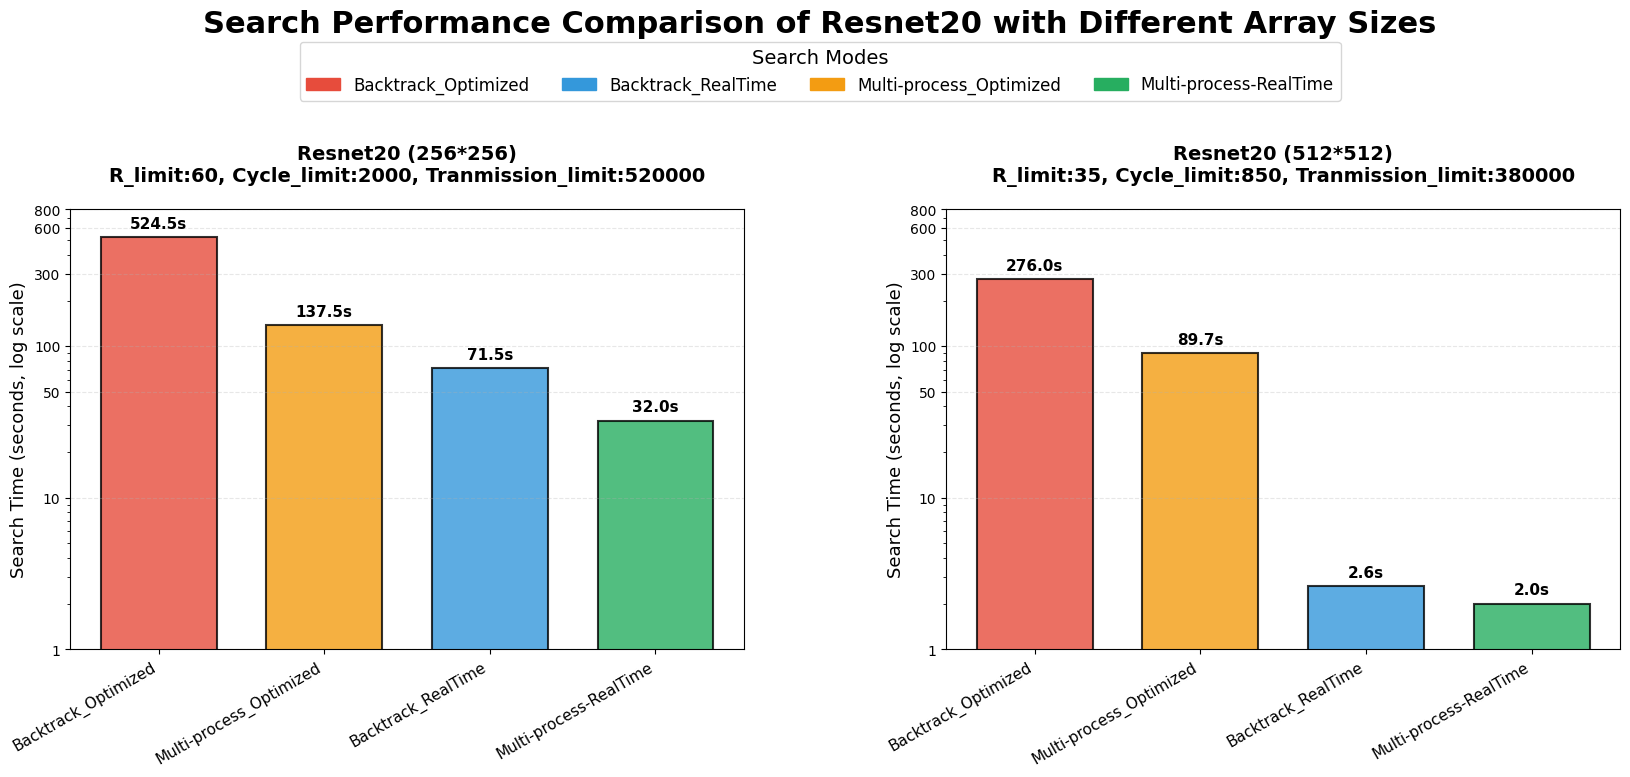

Optimized chart generated as 'resnet20_search_optimized_performance.pdf'


In [55]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# 确保负号正确显示
plt.rcParams['axes.unicode_minus'] = False

# 整理数据（按“耗时”从大到小排序）
data = {
    'Resnet20 (256*256)': {
        'params': 'R_limit:60, Cycle_limit:2000, Tranmission_limit:520000',
        'modes': [
            ('repeat_pruned + Backtrack_Optimized', 524.54, 1156),
            ('repeat_pruned + Multi-process_Optimized', 137.48, 1156),
            ('repeat_pruned + Backtrack_RealTime', 71.49, 1156),
            ('repeat_pruned + Multi-process-RealTime', 32.05, 1156)
        ]
    },
    'Resnet20 (512*512)': {
        'params': 'R_limit:35, Cycle_limit:850, Tranmission_limit:380000',
        'modes': [
            ('repeat_pruned + Backtrack_Optimized', 275.96, 180),
            ('repeat_pruned + Multi-process_Optimized', 89.68, 180),
            ('repeat_pruned + Backtrack_RealTime', 2.61, 180),
            ('repeat_pruned + Multi-process-RealTime', 1.99, 180)
        ]
    }
}

# 颜色方案（区分不同搜索模式）
mode_colors = {
    'Backtrack_Optimized': '#E74C3C',
    'Backtrack_RealTime': '#3498DB',
    'Multi-process_Optimized': '#F39C12',
    'Multi-process-RealTime': '#27AE60'
}

# 创建1x2子图（合并为一个大图）
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Search Performance Comparison of Resnet20 with Different Array Sizes', 
             fontsize=22, fontweight='bold', y=0.95)  # 调整主标题位置，为图例留空间

# 柱子宽度
bar_width = 0.7

# 绘制每个子图（使用对数坐标缩小数值差距，同时保留细节）
for idx, (title, info) in enumerate(data.items()):
    ax = axes[idx]
    modes = info['modes']
    mode_names = [m[0].replace('repeat_pruned + ', '') for m in modes]
    times = [m[1] for m in modes]
    schemes = [m[2] for m in modes]
    x_positions = np.arange(len(modes))
    
    # 绘制耗时柱状图（Y轴用对数坐标，缩小差距）
    for i, (mode, time, scheme) in enumerate(modes):
        color_key = mode.split(' + ')[1]
        color = mode_colors[color_key]
        
        # 对数坐标下绘制柱子（避免0值问题，time≥1）
        ax.bar(x_positions[i], time, width=bar_width, color=color, alpha=0.8,
               edgecolor='black', linewidth=1.5)
        
        # 柱子顶部添加耗时标签（保留1位小数）
        ax.text(x_positions[i], time * 1.1, f'{time:.1f}s', 
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # 关键优化：设置Y轴为对数坐标，缩小数值差距
    ax.set_yscale('log')
    # 手动设置Y轴刻度，确保小值不被压缩
    ax.set_yticks([1, 10, 50, 100, 300, 600, 800])
    ax.set_yticklabels(['1', '10', '50', '100', '300', '600', '800'], fontsize=10)
    
    # 子图配置
    ax.set_title(f'{title}\n{info["params"]}', fontsize=14, fontweight='bold', pad=20)
    ax.set_ylabel('Search Time (seconds, log scale)', fontsize=13)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(mode_names, rotation=30, ha='right', fontsize=11)
    ax.grid(True, axis='y', alpha=0.3, linestyle='--')

# 创建全局图例（移至顶部中央）
legend_elements = [Patch(color=mode_colors[key], label=key) for key in mode_colors.keys()]
fig.legend(handles=legend_elements, title='Search Modes', 
           loc='upper center', bbox_to_anchor=(0.5, 0.92),  # 顶部中央位置
           ncol=4, fontsize=12, title_fontsize=14)  # 水平排列4个图例项

# 调整布局（增大顶部留白，适配图例）
plt.subplots_adjust(top=0.7, bottom=0.15, wspace=0.3)
plt.savefig('resnet20_optimized_performance.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("Optimized chart generated as 'resnet20_search_optimized_performance.pdf'")

findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Fo

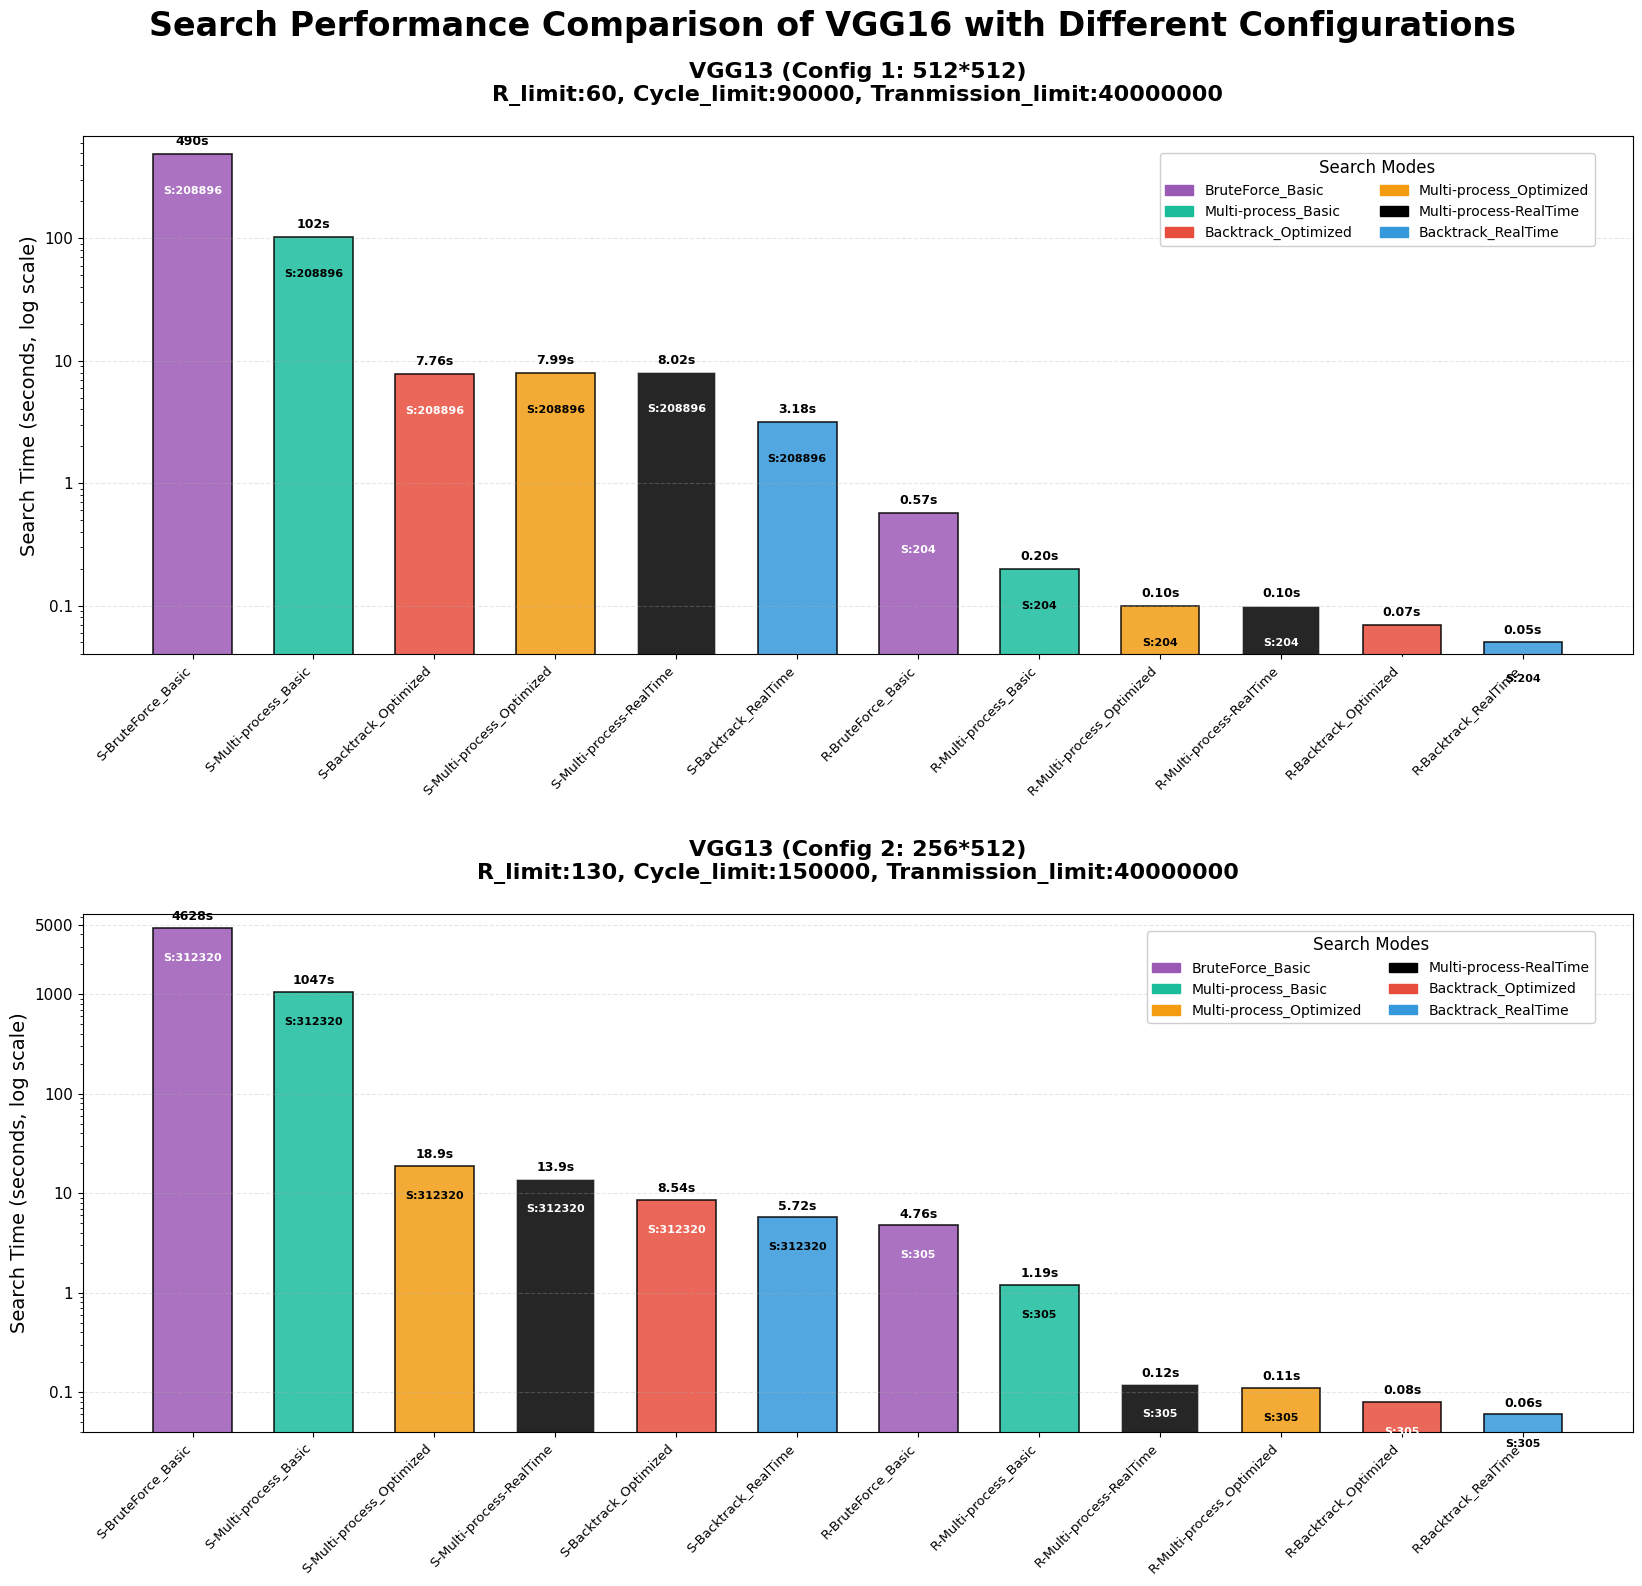

Chart generated as 'vgg16_research_optimal.pdf'


In [57]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# 确保负号正确显示
plt.rcParams['axes.unicode_minus'] = False

# 整理数据（按“耗时”从大到小排序）
data = {
    'VGG13 (Config 1: 512*512)': {
        'params': 'R_limit:60, Cycle_limit:90000, Tranmission_limit:40000000',
        'modes': [
            ('simple_no_prune + BruteForce_Basic', 490.33, 208896),
            ('simple_no_prune + Multi-process_Basic', 102.00, 208896),
            ('simple_no_prune + Backtrack_Optimized', 7.76, 208896),
            ('simple_no_prune + Multi-process_Optimized', 7.99, 208896),
            ('simple_no_prune + Multi-process-RealTime', 8.02, 208896),
            ('simple_no_prune + Backtrack_RealTime', 3.18, 208896),
            ('repeat_pruned + BruteForce_Basic', 0.57, 204),
            ('repeat_pruned + Multi-process_Basic', 0.20, 204),
            ('repeat_pruned + Multi-process_Optimized', 0.10, 204),
            ('repeat_pruned + Multi-process-RealTime', 0.10, 204),
            ('repeat_pruned + Backtrack_Optimized', 0.07, 204),
            ('repeat_pruned + Backtrack_RealTime', 0.05, 204)
        ]
    },
    'VGG13 (Config 2: 256*512)': {
        'params': 'R_limit:130, Cycle_limit:150000, Tranmission_limit:40000000',
        'modes': [
            ('simple_no_prune + BruteForce_Basic', 4627.56, 312320),
            ('simple_no_prune + Multi-process_Basic', 1047.04, 312320),
            ('simple_no_prune + Multi-process_Optimized', 18.85, 312320),
            ('simple_no_prune + Multi-process-RealTime', 13.92, 312320),
            ('simple_no_prune + Backtrack_Optimized', 8.54, 312320),
            ('simple_no_prune + Backtrack_RealTime', 5.72, 312320),
            ('repeat_pruned + BruteForce_Basic', 4.76, 305),
            ('repeat_pruned + Multi-process_Basic', 1.19, 305),
            ('repeat_pruned + Multi-process-RealTime', 0.12, 305),
            ('repeat_pruned + Multi-process_Optimized', 0.11, 305),
            ('repeat_pruned + Backtrack_Optimized', 0.08, 305),
            ('repeat_pruned + Backtrack_RealTime', 0.06, 305)
        ]
    }
}

# 颜色方案（保持一致性，黑色模式加白色边框）
mode_colors = {
    'Backtrack_RealTime': '#3498DB',
    'Backtrack_Optimized': '#E74C3C',
    'BruteForce_Basic': '#9B59B6',
    'Multi-process-RealTime': '#000000',
    'Multi-process_Optimized': '#F39C12',
    'Multi-process_Basic': '#1ABC9C'
}

# 创建2行1列子图（纵向布局，增大高度适配间距）
fig, axes = plt.subplots(2, 1, figsize=(20, 18))  # 高度从16增至18英寸
fig.suptitle('Search Performance Comparison of VGG16 with Different Configurations', 
             fontsize=24, fontweight='bold', y=0.97)

# 柱子宽度
bar_width = 0.65

# 绘制每个子图（嵌入图例，优化标签显示）
for idx, (title, info) in enumerate(data.items()):
    ax = axes[idx]
    modes = info['modes']
    # 简化模式名称（S=无剪枝，R=重复剪枝）
    mode_names = [m[0].replace('simple_no_prune + ', 'S-').replace('repeat_pruned + ', 'R-') for m in modes]
    times = [m[1] for m in modes]
    schemes = [m[2] for m in modes]
    x_positions = np.arange(len(modes))
    
    # 绘制柱状图并收集图例元素
    legend_elements = []
    added_labels = set()
    for i, (mode, time, scheme) in enumerate(modes):
        color_key = mode.split(' + ')[1]
        color = mode_colors[color_key]
        
        # 黑色柱子特殊处理
        edge_color = 'white' if color_key == 'Multi-process-RealTime' else 'black'
        ax.bar(x_positions[i], time, width=bar_width, color=color, alpha=0.85,
               edgecolor=edge_color, linewidth=1.2)
        
        # 收集不重复的图例元素
        if color_key not in added_labels:
            legend_elements.append(Patch(color=color, label=color_key))
            added_labels.add(color_key)
        
        # 顶部耗时标签（动态精度）
        if time >= 100:
            time_label = f'{time:.0f}s'
        elif time >= 10:
            time_label = f'{time:.1f}s'
        else:
            time_label = f'{time:.2f}s'
        ax.text(x_positions[i], time * 1.12, time_label, 
                ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        # 中部方案数标签（适配颜色）
        text_color = 'white' if color in ['#000000', '#9B59B6', '#E74C3C'] else 'black'
        ax.text(x_positions[i], time * 0.5, f'S:{scheme}', 
                ha='center', va='center', fontsize=8, fontweight='bold', color=text_color)
    
    # 嵌入子图图例（右上角，不遮挡数据）
    ax.legend(handles=legend_elements, title='Search Modes', 
              loc='upper right', bbox_to_anchor=(0.98, 0.98),
              fontsize=10, title_fontsize=12, framealpha=0.95, ncol=2)
    
    # 对数坐标适配大跨度数值
    ax.set_yscale('log')
    ax.set_yticks([0.01, 0.1, 1, 10, 100, 1000, 5000])
    ax.set_yticklabels(['0.01', '0.1', '1', '10', '100', '1000', '5000'], fontsize=11)
    
    # 子图配置
    ax.set_title(f'{title}\n{info["params"]}', fontsize=16, fontweight='bold', pad=25)
    ax.set_ylabel('Search Time (seconds, log scale)', fontsize=14)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(mode_names, rotation=45, ha='right', fontsize=9.5)
    ax.grid(True, axis='y', alpha=0.3, linestyle='--')
    ax.set_ylim(0.04, max(times) * 1.4)  # 预留标签空间

# 关键调整：增大子图纵向间距（hspace从0.3增至0.5）
plt.subplots_adjust(top=0.9, bottom=0.18, hspace=0.5)  # hspace增大，避免上下子图遮挡
plt.savefig('vgg16_2rows1col_wider_spacing.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("Chart generated as 'vgg16_research_optimal.pdf'")